# Oblique shock waves

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy.optimize import root_scalar

# Pint gives us some helpful unit conversion
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity # We will use this to construct quantities (value + unit)

In [2]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 200
plt.rcParams['savefig.dpi'] = 200

An **oblique shock** is a shock that the flow encounters at some angle. The shock deflects the flow away from its normal direction, and the final velocity may remain supersonic.

:::{figure-md} fig-oblique-shock
<img src="../images/oblique-shock.*" alt="Oblique shock diagram" class="bg-primary mb-1" width="400px">

Oblique shock showing initial and final velocity components.
:::

{numref}`Figure {number} <fig-oblique-shock>` shows the flow velocity before and after an oblique shock. The shock slows down the normal component of velocity, such that $V_{2n} < V_{1n}$, but the tangential component $V_t$ is unaffected by the shock and remains constant.

The shock occurs at the **shock angle** $\theta$ with respect to the flow direction (horizontal in this case), and deflects the flow by the **deflection angle** $\delta$.

## Equations of motion

So, how does an oblique shock affect the flow? It acts as a normal shock, based on the normal component of the velocity—and therefore the normal Mach number determines the strength of the shock:

$$
M_{1n} = \frac{V_{1n}}{a_{1n}} = \frac{V_1 \sin \theta}{a_1} = M_1 \sin \theta \;,
$$

where we see that the normal component of speed of sound is the same as the overall speed of sound upstream of the shock: $a_{1n} = a_1$. (This should not be surprising,
since speed of sound is a property of the gas state.)

For an oblique shock to exist, $M_{1n} \geq 1$. We thus have two limits:

1. $\theta_{\min} = \sin^{-1} \frac{1}{M_1} = \mu$, which is the Mach angle.
2. $\theta_{\max} = \sin^{-1} \left( \frac{M_1}{M_1} \right)$ = 90°, which is a normal shock where $M_{1n} = M_1$.

```{note}
The oblique shock strength depends on $M_{1n}$, and is proportional to the shock angle $\theta$.
```

Based on the geometry in {numref}`Figure {number} <fig-oblique-shock>`, we can express the overall downstream Mach number as

$$
M_2 = \frac{M_{2n}}{\sin(\theta - \delta)} \;,
$$ (eq_oblique_M2)

where $M_{2n} = f(M_{1n})$ based on our *normal shock relations* given in the [Normal Shocks](./normal-shocks.ipynb) module.
This means we also know how the stagnation pressure changes through an oblique shock: $p_{t2} / p_{t1} = f(M_{1n})$, where $p_{t1} = p_1 \cdot f(M_1)$.

However, we need an additional relationship between $M_1$, $\theta$, and $\delta$ to be able to solve any problems. Let's use the continuity equation applied to motion through the shock wave to obtain this, keeping in mind that only the normal component of velocity contributes to mass crossing the shock:

$$
\begin{gather*}
\rho_1 V_{1n} = \rho_2 V_{2n} \\
\frac{\rho_2}{\rho_1} = \frac{V_{1n}}{V_{2n}} \;,
\end{gather*}
$$

but we can use the geometry to relate the normal and tangential components of velocity:

$$
\begin{gather*}
\tan \theta = \frac{V_{1n}}{V_{1t}} \\
\tan (\theta - \delta) = \frac{V_{2n}}{V_{2t}} \\
V_{1t} = V_{2t} = V_t \\
\rightarrow \frac{\rho_2}{\rho_1} = \frac{V_t \tan \theta}{V_t \tan (\theta - \delta)} = \frac{\tan \theta}{\tan (\theta - \delta)} \;.
\end{gather*}
$$

But, from our normal shock relations, we know that $\rho_2 / \rho_1 = f(M_{1n})$, which we can combine with the last equation:

$$
\frac{\rho_2}{\rho_1} = \frac{V_t \tan \theta}{V_t \tan (\theta - \delta)} = \frac{\tan \theta}{\tan (\theta - \delta)} = \frac{(\gamma+1) M_{1n}^2}{(\gamma-1) M_{1n}^2 + 2} \;.
$$

Substituting $ M_{1n} = M_1 \sin \theta $ into that equation, and using some trigonometric identities, we can obtain an equation for the deflection angle $\delta$ as a function of $M_1$ and the shock angle $\theta$:

$$
\tan \delta = 2 \cot \theta \left[ \frac{M_1^2 \sin^2 \theta - 1}{M_1^2 \left( \gamma + \cos 2\theta \right) + 2} \right] \;.
$$ (eq_oblique)

If we apply this equation at the shock angle limits of $\theta = \mu = \sin^{-1} (1/M_1)$ and $\theta$ = 90°, we see that $\delta = 0$ and there is no deflection at either limit.

## Applying equations for oblique shocks

Given an upstream Mach number $M_1$ and shock angle $\theta$, we can solve Equation {eq}`eq_oblique` to find the deflection angle $\delta.$

Let's create a function to do that, and also one to calculate the Mach number following a normal shock:

In [274]:
def oblique_shock_delta(theta, gamma, mach):
    '''Calculate oblique shock deflection from shock angle and Mach'''
    return (
        np.arctan((2.0/np.tan(theta)) * (
            (mach**2 * np.sin(theta)**2 - 1) /
            (2 + mach**2 * (gamma + np.cos(2*theta)))
            ))
        )

def get_mach_normal(gamma, mach1):
    '''Calculate Mach number after a normal shock'''
    return np.sqrt(
        (mach1**2 + 2/(gamma - 1))/(2 * gamma * mach1**2/(gamma - 1) - 1)
        )

We can confirm the limits of oblique shocks, at $\theta_{\min} = \mu$ and $\theta_{\max} = $ 90°:

In [273]:
mach = 2.0
gamma = 1.4
mu = np.arcsin(1/mach)
delta_min = oblique_shock_delta(mu, gamma, mach)
print(f'Deflection at minimum shock angle: {delta_min: .3f}')
delta_max = oblique_shock_delta(np.pi/2, gamma, mach)
print(f'Deflection at maximum shock angle: {delta_min: .3f}')

Deflection at minimum shock angle: -0.000
Deflection at maximum shock angle: -0.000


### Example: oblique shock with given angle

As another example, let's consider an oblique shock that forms in air at an angle
$\theta = $ 45°. The conditions before the shock are 40°C, 1.2 bar, and a Mach number of 3.0. What are the Mach number and flow direction after the shock?

We can find the flow direction (i.e., deflection angle) by solving Equation {eq}`eq_oblique` directly using the given information. We can find the Mach number after the shock ($M_2$) by using the normal component of $M_1$, applying our normal shock relationship (Equation {eq}`eq_normal_shock`), and then using Equation {eq}`eq_oblique_M2`:

In [275]:
mach1 = 3.0
gamma = 1.4
theta = 45 * np.pi/180

delta = oblique_shock_delta(theta, gamma, mach1)
print(f'Deflection angle = {delta*180/np.pi: .2f}°')

mach_1n = mach1 * np.sin(theta)
mach_2n = get_mach_normal(gamma, mach_1n)
mach2 = mach_2n / np.sin(theta - delta)
print(f'Downstream Mach number = {mach2: .3f}')

Deflection angle =  25.62°
Downstream Mach number =  1.681


This is a *weak shock* because the downstream flow remains supersonic.

## Finding shock angle given deflection

Now, what do we do when we need to find the shock angle $\theta$ given a deflection angle $\delta$ and the upstream Mach number $M_1$? This problem is a bit trickier to solve, because we cannot solve Equation {eq}`eq_oblique` directly for $\theta$—plus, there are two potential solutions: a weak shock and strong shock.

Traditionally, since it was previously so challenging to solve the equation, and most applications focus on air where we can assume $\gamma = 1.4$, people used tabulated and charted solutions to this equation. Most gas dynamics/compressible flow textbooks contain versions of these charts, which were originally published by NACA, the precursor to NASA, in the famous Report 1135 {cite}`1135` (Neil Armstrong had a copy!).

For example, {numref}`Figure {number} <fig-oblique-chart>` shows how shock angle varies with deflection angle for $\delta =$ 0° to 32°, for various upstream Mach numbers.

:::{figure-md} fig-oblique-chart
<img src="../images/oblique-chart.png" alt="Oblique shock charg" class="bg-primary mb-1" width="600px">

Chart for oblique shock showing how shock angle varies with deflection angle, for various upstream Mach numbers {cite}`1135`.
:::

Using a chart like this is relatively fast, though not very precise, and limits you to gases where $\gamma = 1.4$.

An alternative approach is to numerically solve the equation using a root finder. To do this, we need a function that rearranges Equation {eq}`eq_oblique` to equal zero, if the appropriate value of $\theta$ is input:

In [ ]:
def oblique_shock_theta(theta, gamma, delta, mach):
    '''Use for theta as unknown variable'''
    return (
        np.tan(delta) - oblique_shock_delta(theta, gamma, mach)
        )

Then, we can use the [`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html) to find the value of $\theta$.

As an example, let's consider a case where a Mach 2.2 flow of air is deflected by 14°. What is the Mach number after the shock? Assume the weak shock solution applies.

In [279]:
mach1 = 2.2
gamma = 1.4
delta = 14 * np.pi/180

# we need to give some initial guesses for the solution
root = root_scalar(
    oblique_shock_theta, x0=50*np.pi/180, x1=30*np.pi/180,
    args=(gamma, delta, mach1)
    )
theta = root.root
print(f'Shock angle = {theta*180/np.pi: .2f}°')

Shock angle =  40.43°


If we wanted the strong shock solution, we could try giving initial guesses at higher angles:

In [280]:
root = root_scalar(
    oblique_shock_theta, x0=70*np.pi/180, x1=80*np.pi/180,
    args=(gamma, delta, mach1)
    )
theta_strong = root.root
print(f'Shock angle (strong) = {theta_strong*180/np.pi: .2f}°')

Shock angle (strong) =  82.03°


This approach works reasonably well in most cases, but you may face situations where the root-finding algorithm fail to converge. (If you try to recreate an oblique shock chart using the code given above, you will certainly encounter this behavior!)

An alternative approach is to transform Equation {eq}`eq_oblique` into a cubic equation, and then find the roots of this equation. Let's call $x = \cot \theta$, then we can express the equation as

$$
f(x) = x^3 + C x^2 - A x + (B - A C) = 0 \;,
$$ (eq_oblique_cubic)

where 

$$
\begin{gather*}
x = \cot \theta \\
A = M_1^2 - 1 \\
B = \frac{\gamma + 1}{2} M_1^4 \tan \delta \\
C = \left( 1 + \frac{\gamma + 1}{2} M_1^2 \right) \tan \delta \;.
\end{gather*}
$$

:::{admonition} Detailed proof:
:class: tip, dropdown

Obtaining Equation {eq}`eq_oblique_cubic` requires a bit of work. First, recognize that we can use the trigonometric identity $\sin^2 \theta = \frac{1}{1 + \cot^2 \theta}$.

$$
\begin{gather*}
\tan \delta = \cot \theta \frac{M_1^2 \sin^2 \theta - 1}{\frac{\gamma+1}{2} M_1^2 - (M_1^2 \sin^2 \theta - 1)} \\
\tan \delta \left[ \frac{\gamma+1}{2} M_1^2 - \left(M_1^2 \frac{1}{1+x^2} - 1 \right) \right] = x \left( M_1^2 \frac{1}{1+x^2} - 1 \right) \\
\tan \delta \left[ \frac{\gamma+1}{2} M_1^2 (1+x^2) - M_1^2 + 1 + x^2 \right] = x M_1^2 - x(1 + x^2) \\
\tan \delta \frac{\gamma+1}{2} M_1^2 + \left( \tan \delta \frac{\gamma+1}{2} M_1^2 \right) x^2 + \tan \delta (1 - M_1^2) + x^2 \tan \delta = x M_1^2 - x - x^3 \\
x^3 + x^2 \left( 1 + \frac{\gamma+1}{2} M_1^2 \right) \tan \delta - x (M_1^2 - 1) + \tan \delta \left[ \frac{\gamma+1}{2} M_1^2 + (1 - M_1^2) \right] = 0
\end{gather*}
$$

Now, we can recognize the coefficients of $x^2$ and $x$ as $C$ and $A$ from above.
With some additional work, we can see that

$$
\tan \delta \left[ \frac{\gamma+1}{2} M_1^2 + (1 - M_1^2) \right] = B - A C \;.
$$
:::

To actually solve the cubic equation, we could use an iterative method, such as the one proposed by Collar in 1959 {cite}`collar1959`, or we can use a more direct method provided by NumPy via the [`numpy.roots()` function](https://numpy.org/doc/stable/reference/generated/numpy.roots.html).
This gives us all three roots of the cubic polynomial. 
We can disregard the negative solution as unphysical; then, the larger solution is associated with the strong shock, and the smaller positive solution is associated with the weak shock.

In [281]:
mach1 = 2.2
gamma = 1.4
delta = 14 * np.pi/180

# calculate coefficients
A = mach1**2 - 1
B = 0.5*(gamma + 1) * mach1**4 * np.tan(delta)
C = (1 + 0.5*(gamma + 1)*mach1**2)*np.tan(delta)
coeffs = [1, C, -A, (B - A*C)]

# roots of a cubic equation, two positive solutions
# (disregard the negative)
roots = np.array([r for r in np.roots(coeffs) if r > 0])

thetas = np.arctan(1 / roots)
theta_weak = np.min(thetas)
theta_strong = np.max(thetas)

print(f'Shock angle (weak) = {theta_weak*180/np.pi: .2f}°')
print(f'Shock angle (strong) = {theta_strong*180/np.pi: .2f}°')

Shock angle (weak) =  40.09°
Shock angle (strong) =  82.22°


This provides a robust method for finding the deflection angles given shock angle and upstream Mach number.

Lastly, we may want to find the maximum deflection angle, for a given Mach number. To do this, we can take the derivative of the deflection angle equation and solve for zero.
First, rearrange Equation {eq}`eq_oblique_cubic`:

$$
\begin{gather*}
\cot \delta = \tan \delta \left[ \left(\frac{\gamma+1}{2}\right) + \frac{M_1^2}{M_1^2 \sin^2 \theta - 1} - 1 \right] \\
\frac{d(\cot \delta)}{d\theta} = \sec^2 \theta \left[ \left( \frac{\gamma+1}{2} \right) + \frac{M_1^2}{M_1^2 \sin^2 \theta - 1} - 1 \right] + \tan \theta \left( \frac{\gamma+1}{2} \right) M_1^2 \left[ \frac{-2 M_1^2 \sin \theta \cos \theta}{(M_1^2 \sin^2 \theta - 1)^2} \right] \\
\frac{d(\cot \delta)}{d\theta} = 0 \\
\rightarrow (\gamma M_1^4) \sin^4 \theta + \left[ 2 M_1^2 - \left( \frac{\gamma+1}{2} \right) M_1^4 \right] \sin^2 \theta - \left( 1 + \frac{\gamma+1}{2} M_1^2 \right) = 0
\end{gather*}
$$

$$
\sin^2 \theta_{\max} = \left( \frac{1}{\gamma M_1^2}\right) \left[ \frac{\gamma+1}{4} M_1^2 - 1 + \sqrt{ (\gamma+1) \left( \frac{\gamma+1}{16} M_1^4 + \frac{\gamma-1}{2} M_1^2 + 1 \right) } \right]
$$ (eq_delta_max)

Given $\gamma$ and $M_1$, we can solve Equation {eq}`eq_delta_max` for the maximum shock angle $\theta_{\max}$, and then use Equation {eq}`eq_oblique` to find the associated $\delta_{\max}$.

In [288]:
def get_max_shock_angle(gamma, mach):
    '''Calculate shock angle for maximum deflection angle given Mach number.'''
    return np.arcsin(np.sqrt(
        (1.0/(gamma*mach**2))*(
            (gamma+1)*mach**2/4 - 1 +
            np.sqrt((gamma+1)*((gamma+1)*mach**4/16.0 + (gamma-1)*mach**2/2.0 + 1.0))
            )
        ))

gamma = 1.4
machs = np.arange(1.0, 5.5, 0.5)
#max_thetas = np.zeros_like(machs)
#max_deltas = np.zeros_like(machs)

max_thetas = get_max_shock_angle(gamma, machs)
max_deltas = oblique_shock_delta(max_thetas, gamma, machs)
print(' M_1 theta_max delta_max')
print('--------------------------')
for mach, theta, delta in zip(machs, max_thetas, max_deltas):
    print(f'{mach: .1f} {theta*180/np.pi: .2f}°  {delta*180/np.pi: .2f}°')

 M_1 theta_max delta_max
--------------------------
 1.0  90.00°   0.00°
 1.5  66.59°   12.11°
 2.0  64.67°   22.97°
 2.5  64.78°   29.80°
 3.0  65.24°   34.07°
 3.5  65.69°   36.87°
 4.0  66.06°   38.77°
 4.5  66.35°   40.13°
 5.0  66.58°   41.12°


Using these tools, we can recreate an oblique shock chart!

In [290]:
machs = np.linspace(1, 4, num=10001, endpoint=True)
deltas = np.arange(0, 40, 5) * np.pi / 180
gamma = 1.4

# solve for weak shock solution
thetas_weak_all = []
thetas_strong_all = []
for delta in deltas:
    thetas_weak = np.zeros_like(machs)
    thetas_strong = np.zeros_like(machs)
    
    for idx, mach in enumerate(machs):
        theta_max = get_max_shock_angle(gamma, mach)
        delta_max = oblique_shock_delta(theta_max, gamma, mach)
        
        if delta >= delta_max:
            thetas_weak[idx] = np.nan
            thetas_strong[idx] = np.nan
        else:
            A = mach**2 - 1
            B = 0.5*(gamma+1) * mach**4 * np.tan(delta)
            C = (1 + 0.5*(gamma+1)*mach**2)*np.tan(delta)
            coeffs = [1, C, -A, (B - A*C)]
            # roots of a cubic equation, two positive solutions
            # (disregard the negative)
            roots = np.array([r for r in np.roots(coeffs) if r > 0])
            
            thetas = np.arctan(1 / roots)
            thetas_weak[idx] = np.min(thetas)
            thetas_strong[idx] = np.max(thetas)
    thetas_weak_all.append(thetas_weak)
    thetas_strong_all.append(thetas_strong)

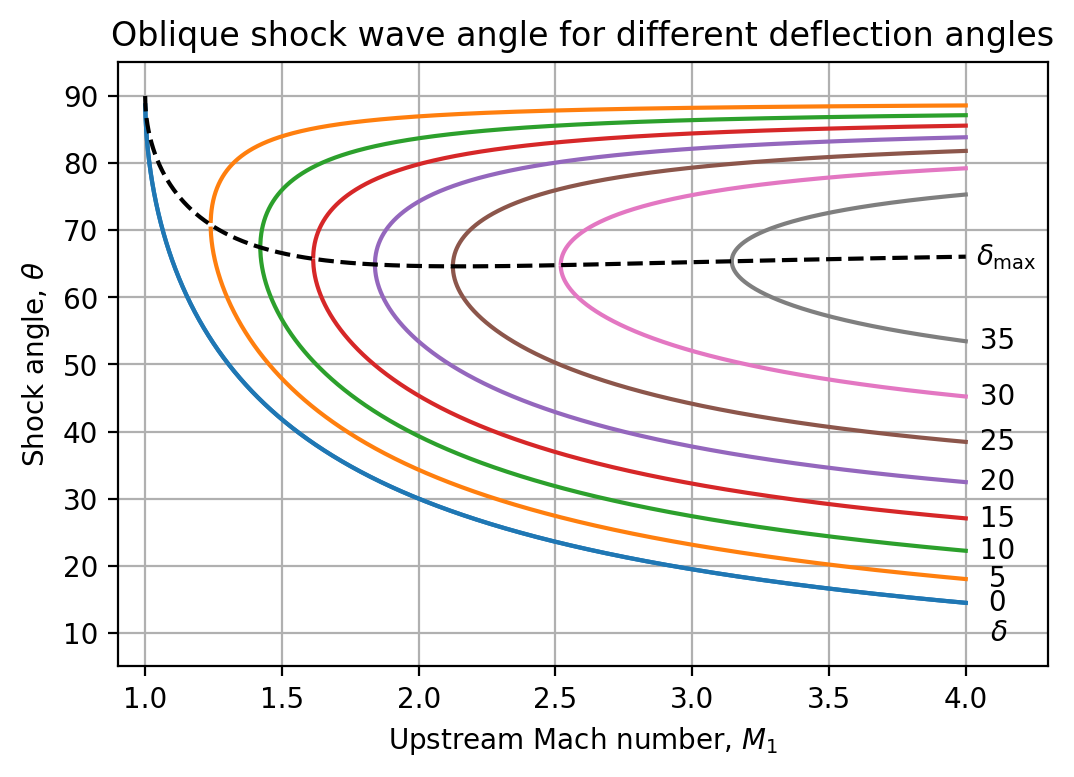

In [291]:
for thetas_weak, thetas_strong in zip(thetas_weak_all, thetas_strong_all):
    p = plt.plot(machs, thetas_weak*180/np.pi)
    color = p[0].get_color()
    plt.plot(machs, thetas_strong*180/np.pi, c=color)
    
thetas_max = get_max_shock_angle(gamma, machs)
deltas_max = oblique_shock_delta(thetas_max, gamma, machs)
plt.plot(machs, thetas_max*180/np.pi, '--', c='k')
plt.text(
    4.15, thetas_max[-1]*180/np.pi, r'$\delta_{\max}$',
    horizontalalignment='center', verticalalignment='center'
    )

# put labels for degrees
for thetas_weak, delta in zip(thetas_weak_all, deltas):
    theta = np.nanmin(thetas_weak)
    plt.text(
        4.1, theta*180/np.pi, f'{delta*180/np.pi: .0f}',
        horizontalalignment='center', verticalalignment='center'
        )

plt.text(
    4.12, 10, r'$\delta$',
    horizontalalignment='center', verticalalignment='center'
    )

plt.grid(True)
plt.title('Oblique shock wave angle for different deflection angles')
plt.xlabel(r'Upstream Mach number, $M_1$')
plt.ylabel(r'Shock angle, $\theta$')
plt.xlim([0.9, 4.3])
plt.ylim([5, 95])
plt.show()